In [1]:
import sys
# Add the src directory to the Python path
sys.path.insert(0, '../src')

In [2]:
from datetime import datetime

from botcoin.profilers.stock import StockProfiler
from botcoin.utils.stream_data import generate_price_stream
from botcoin.utils.visual.statistics import plot_kde_with_stats, plot_price_histogram_with_stats

In [3]:
symbol = "COIN"
profiler = StockProfiler()

In [4]:
profile = profiler.profile(symbol)

2025-06-09 23:33:47,201 - DataManager - WARNING: The start date 2020-06-10 is before the IPO date 2021-04-14 for COIN. Adjusting start date to the IPO date.
2025-06-09 23:33:47,355 - YfDataProvider - WARNING: The date range does not contain any market open times.
2025-06-09 23:33:47,359 - DataManager - INFO: Data saved to data\COIN_ohlcv_1d.parquet


In [5]:
returns_1min = profile["1min_returns"]
print(f"Profile for {symbol}:")
print(f"Number of 1-minute returns for {symbol}: {len(returns_1min)}")
print(f"Mean 1-minute returns for {symbol}: {returns_1min.mean():.6f}")
print(f"Standard deviation of 1-minute returns for {symbol}: {returns_1min.std():.6f}")
print(f"Max 1-minute return for {symbol}: {returns_1min.max():.6f}")
print(f"Min 1-minute return for {symbol}: {returns_1min.min():.6f}")

Profile for COIN:
Number of 1-minute returns for COIN: 7432
Mean 1-minute returns for COIN: 0.000008
Standard deviation of 1-minute returns for COIN: 0.001675
Max 1-minute return for COIN: 0.019090
Min 1-minute return for COIN: -0.032969


In [6]:
returns_1d = profile["1d_returns"]
print(f"Number of 1-day returns for {symbol}: {len(returns_1d)}")
print(f"Mean 1-day returns for {symbol}: {returns_1d.mean():.6f}")
print(f"Standard deviation of 1-day returns for {symbol}: {returns_1d.std():.6f}")
print(f"Max 1-day return for {symbol}: {returns_1d.max():.6f}")
print(f"Min 1-day return for {symbol}: {returns_1d.min():.6f}")

Number of 1-day returns for COIN: 1043
Mean 1-day returns for COIN: 0.000812
Standard deviation of 1-day returns for COIN: 0.048589
Max 1-day return for COIN: 0.253661
Min 1-day return for COIN: -0.162111


In [7]:
# Compute percentage of data within ±1 std
data = returns_1d
mean = data.mean()
std = data.std()
lower_bound = mean - std
upper_bound = mean + std
within_std = data[(data >= lower_bound) & (data <= upper_bound)]
percentage_within_std = len(within_std) / len(data) * 100
print(f"Percentage of 1-day returns within ±1 std for {symbol}: {percentage_within_std:.2f}%")

Percentage of 1-day returns within ±1 std for COIN: 74.59%


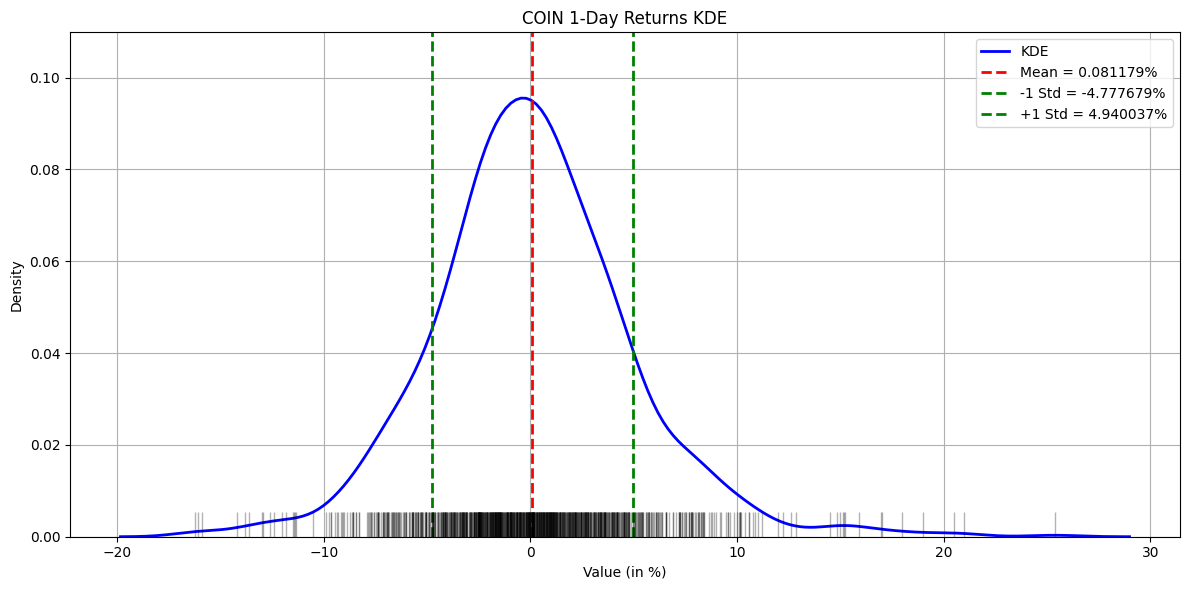

In [8]:
plot_kde_with_stats(returns_1d, title=f"{symbol} 1-Day Returns KDE")


In [9]:
ohlcv = profile['ohlcv_1min']

prices = generate_price_stream(ohlcv, candle_duration='1min', avg_freq_per_minute=10)

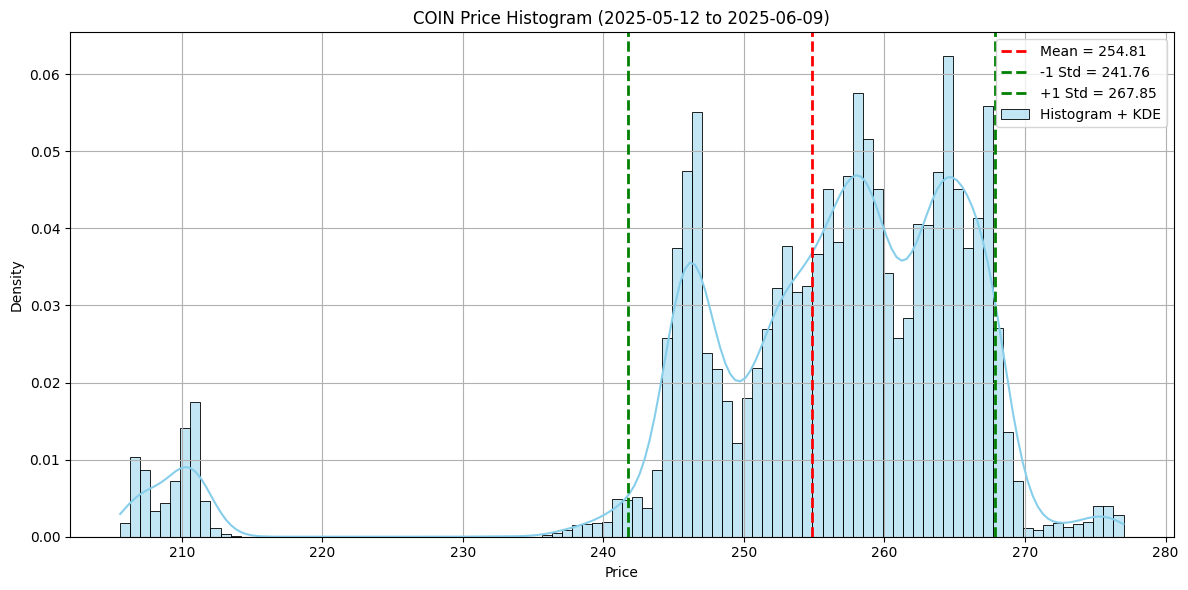

In [10]:
start_time = prices.index.min()
end_time = prices.index.max()

# convert Unix timestamps to datetime objects
start_date = datetime.fromtimestamp(start_time).date()
end_date = datetime.fromtimestamp(end_time).date()

plot_price_histogram_with_stats(prices['price'], title=f"{symbol} Price Histogram ({start_date} to {end_date})", bins=100)